### In this project, we will work on the US hospitals Diabetes data for years 1999-2008. 
The dataset is available at https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008. 
It contains data for 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied a set of criteria which could be found at the data page. There are two tables in this dataset, one is the table containing all the data and the other is the metadata table.

We are going wrangle the dataset into a relational data model visualise part of the data.

First, load the two tables.

In [1]:
library(tidyverse)
library(magrittr)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract



In [2]:
diabetes <- read_csv("diabetic_data.csv")
metadata <- read_csv("IDs_mapping.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  encounter_id = col_integer(),
  patient_nbr = col_integer(),
  admission_type_id = col_integer(),
  discharge_disposition_id = col_integer(),
  admission_source_id = col_integer(),
  time_in_hospital = col_integer(),
  num_lab_procedures = col_integer(),
  num_procedures = col_integer(),
  num_medications = col_integer(),
  number_outpatient = col_integer(),
  number_emergency = col_integer(),
  number_inpatient = col_integer(),
  number_diagnoses = col_integer()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  admission_type_id = col_character(),
  description = col_character()
)


In [3]:
diabetes %>% head()
metadata 


encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


admission_type_id,description
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NULL
7,Trauma Center
8,Not Mapped
NA,NA
discharge_disposition_id,description


Find the number of total rows in the two data frames.

In [4]:
diabetes %>%  count()
metadata %>% count()

n
101766


n
67


Check the data types of each column in the diabetes data frame.

In [5]:
diabetes %>% glimpse()

Observations: 101,766
Variables: 50
$ encounter_id               <int> 2278392, 149190, 64410, 500364, 16680, 3...
$ patient_nbr                <int> 8222157, 55629189, 86047875, 82442376, 4...
$ race                       <chr> "Caucasian", "Caucasian", "AfricanAmeric...
$ gender                     <chr> "Female", "Female", "Female", "Male", "M...
$ age                        <chr> "[0-10)", "[10-20)", "[20-30)", "[30-40)...
$ weight                     <chr> "?", "?", "?", "?", "?", "?", "?", "?", ...
$ admission_type_id          <int> 6, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 1...
$ discharge_disposition_id   <int> 25, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, ...
$ admission_source_id        <int> 1, 7, 7, 7, 7, 2, 2, 7, 4, 4, 7, 4, 7, 7...
$ time_in_hospital           <int> 1, 3, 2, 2, 1, 3, 4, 5, 13, 12, 9, 7, 7,...
$ payer_code                 <chr> "?", "?", "?", "?", "?", "?", "?", "?", ...
$ medical_specialty          <chr> "Pediatrics-Endocrinology", "?", "?", "?...
$ num_lab_proced

### We can find that the diabetes table is quite messy, there are many missing values represented by "?" and the data type for some of the columns are not correct, such as columns "weight", "diag_1", "diag_2" and "diag_3" which should be numeric but somehow are character. Also, all the metadata is stored in one table making it difficult if we want to join the table with the main table. There are also some other issues with this dataset and hence we chose to work on it. In this project, we will wrangle the dataset into a tidy format and split the metadata into several seperate tables which will make a coherent relational data model.

Also, there are in total 50 columns in this dataset, and some of the column names are not so clear in meaning, the detailed explanation of the columns are diplayed on this website https://www.hindawi.com/journals/bmri/2014/781670/tab1/. We can scrape this table and save it as a metadata table.

In [6]:
library(rvest)

Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:purrr':

    pluck

The following object is masked from 'package:readr':

    guess_encoding



In [7]:
url <- "https://www.hindawi.com/journals/bmri/2014/781670/tab1/"

In [8]:
library(dplyr)

In [9]:
df <- url %>%
  read_html() %>%
  html_nodes(".table") %>%
  html_table() #header=TRUE
df

X1,X2,X3,X4
,,,
Feature name,Type,Description and values,% missing
,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hispanic, and other",2%
Gender,Nominal,"Values: male, female, and unknown/invalid",0%
Age,Nominal,"Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)",0%
Weight,Numeric,Weight in pounds.,97%
Admission type,Nominal,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available",0%


#### However, the output is not in the desired table format as the length of it is 1.

In [10]:
df %>% class()
df %>% length()

[1] "list"

[1] 1

#### Try to slice the it and recombine it.

In [11]:
df[[1]][2]

X2
""
Type
""
Numeric
Numeric
Nominal
Nominal
Nominal
Numeric
Nominal


In [12]:
attributes <- as_tibble(x=c(df[[1]][1], df[[1]][2], df[[1]][3], df[[1]][4]))
attributes

X1,X2,X3,X4
,,,
Feature name,Type,Description and values,% missing
,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hispanic, and other",2%
Gender,Nominal,"Values: male, female, and unknown/invalid",0%
Age,Nominal,"Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)",0%
Weight,Numeric,Weight in pounds.,97%
Admission type,Nominal,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available",0%


In [13]:
attributes %>% class
attributes %>% length

[1] "tbl_df"     "tbl"        "data.frame"

[1] 4

#### We can work on it now.

In [14]:
attributes %>%
  filter(X2=="Numeric")

X1,X2,X3,X4
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Weight,Numeric,Weight in pounds.,97%
Time in hospital,Numeric,Integer number of days between admission and discharge,0%
Number of lab procedures,Numeric,Number of lab tests performed during the encounter,0%
Number of procedures,Numeric,Number of procedures (other than lab tests) performed during the encounter,0%
Number of medications,Numeric,Number of distinct generic names administered during the encounter,0%
Number of outpatient visits,Numeric,Number of outpatient visits of the patient in the year preceding the encounter,0%
Number of emergency visits,Numeric,Number of emergency visits of the patient in the year preceding the encounter,0%
Number of inpatient visits,Numeric,Number of inpatient visits of the patient in the year preceding the encounter,0%


In [15]:
attributes %>% names()

[1] "X1" "X2" "X3" "X4"

In [16]:
attributes %>% count()

n
32


In [18]:
colnames(attributes) <- (attributes[2, ])

In [19]:
attributes %>% names()
attributes %>% head()

[1] "Feature name"           "Type"                   "Description and values"
[4] "% missing"

Feature name,Type,Description and values,% missing
,,,
Feature name,Type,Description and values,% missing
,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hispanic, and other",2%


In [17]:
attributes %<>% 
    filter(row_number() != 2L) #drop the second row which is the name of the columns

In [18]:
attributes %>% count()

n
31


In [19]:
attributes #this is the attributes table we got which describes the attributes in the diabetes table

X1,X2,X3,X4
,,,
,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hispanic, and other",2%
Gender,Nominal,"Values: male, female, and unknown/invalid",0%
Age,Nominal,"Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)",0%
Weight,Numeric,Weight in pounds.,97%
Admission type,Nominal,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available",0%
Discharge disposition,Nominal,"Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available",0%


In [20]:
attributes %>% write_csv("attributes.csv")

### Split the metadata table into three tables containing the descriptions of code for columns "admission_type_id", "discharge_disposition_id", "admission_source_id" respectively. 

In [21]:
admission_type <- metadata %>%
   slice(1:8) %>%
   mutate(admission_type_id=as.integer(admission_type_id)) #change the admission_type_id into integer type
admission_type

admission_type_id,description
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NULL
7,Trauma Center
8,Not Mapped


In [22]:
admission_type %>% glimpse() 

Observations: 8
Variables: 2
$ admission_type_id <int> 1, 2, 3, 4, 5, 6, 7, 8
$ description       <chr> "Emergency", "Urgent", "Elective", "Newborn", "No...


In [23]:
admission_type %>% write_csv("admission_type.csv")

In [24]:
discharge_disposition <- metadata %>%
   slice(11:40) %>%
   rename(discharge_disposition_id="admission_type_id") %>%
   mutate(discharge_disposition_id=as.integer(discharge_disposition_id))
discharge_disposition

discharge_disposition_id,description
1,Discharged to home
2,Discharged/transferred to another short term hospital
3,Discharged/transferred to SNF
4,Discharged/transferred to ICF
5,Discharged/transferred to another type of inpatient care institution
6,Discharged/transferred to home with home health service
7,Left AMA
8,Discharged/transferred to home under care of Home IV provider
9,Admitted as an inpatient to this hospital
10,Neonate discharged to another hospital for neonatal aftercare


In [25]:
discharge_disposition %>% glimpse()

Observations: 30
Variables: 2
$ discharge_disposition_id <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
$ description              <chr> "Discharged to home", "Discharged/transfer...


In [26]:
discharge_disposition %>% write_csv("discharge_disposition.csv")

In [27]:
admission_source <- metadata %>%
   slice(43:67) %>%
   rename(admission_source_id="admission_type_id") %>%
   mutate(admission_source_id=as.integer(admission_source_id))
admission_source

admission_source_id,description
1,Physician Referral
2,Clinic Referral
3,HMO Referral
4,Transfer from a hospital
5,Transfer from a Skilled Nursing Facility (SNF)
6,Transfer from another health care facility
7,Emergency Room
8,Court/Law Enforcement
9,Not Available
10,Transfer from critial access hospital


In [28]:
admission_source %>% glimpse()

Observations: 25
Variables: 2
$ admission_source_id <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, ...
$ description         <chr> "Physician Referral", "Clinic Referral", "HMO R...


In [30]:
admission_source %>% write_csv("admission_source.csv")

### Now we have the four metadata tables (attributes, admission_type, discharge_type, discharge_position and admission_source) and the main table containing all the information about diabetes, we are going to clean the main table and do some visualisation.

We will work on the diabetes data frame. First, convert "?" with NA.

First, count the observations with values as "?" in each row. This is ensure our repalcing worked properly by comparing this result with the result of replacing.

In [11]:
map_df(diabetes, ~sum(. == "?"))

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2273,0,0,98569,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As there are too many columns, we will just have look at the columns that contain a question mark.

In [12]:
map_df(diabetes, ~sum(. == "?")) %>% 
  select_if(.!=0)

race,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3
2273,98569,40256,49949,21,358,1423


In [13]:
diabetes %<>%
  mutate_all(.,funs(replace(.,.=="?", NA)))

In [14]:
map_df(diabetes, ~sum(is.na(.)))

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2273,0,0,98569,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
map_df(diabetes, ~sum(is.na(.))) %>% 
  select_if(.!=0)

race,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3
2273,98569,40256,49949,21,358,1423


The result is consistent with the count of question marks indicating the convertion works well.

Then, we will convert the "weight", "diag_1", "diag_2" and "diag_3" columns into numeric.

In [16]:
diabetes %>% head()

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),NA,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NA,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NA,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NA,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NA,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),NA,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [17]:
diabetes %<>% mutate(weight=as.numeric(weight), 
                    diag_1=as.numeric(diag_1),
                    diag_2=as.numeric(diag_2),
                    diag_3=as.numeric(diag_3))
diabetes %>% head()

Warning message in evalq(as.numeric(weight), <environment>):
"NAs introduced by coercion"Warning message in evalq(as.numeric(diag_1), <environment>):
"NAs introduced by coercion"Warning message in evalq(as.numeric(diag_2), <environment>):
"NAs introduced by coercion"Warning message in evalq(as.numeric(diag_3), <environment>):
"NAs introduced by coercion"

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),NA,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NA,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NA,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NA,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NA,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),NA,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [37]:
diabetes %>% head() %>% is.na() 

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Now we can check the missing values using the functions in skimr and visualise it using visdat.

In [334]:
library(skimr)
library(visdat)

In [335]:
diabetes %>%
  skim() %>%
  kable()

Skim summary statistics  
 n obs: 101766    
 n variables: 50    

Variable type: character

|         variable         | missing | complete |   n    | min | max | empty | n_unique |
|--------------------------|---------|----------|--------|-----|-----|-------|----------|
|        A1Cresult         |    0    |  101766  | 101766 |  2  |  4  |   0   |    4     |
|         acarbose         |    0    |  101766  | 101766 |  2  |  6  |   0   |    4     |
|      acetohexamide       |    0    |  101766  | 101766 |  2  |  6  |   0   |    2     |
|           age            |    0    |  101766  | 101766 |  6  |  8  |   0   |    10    |
|          change          |    0    |  101766  | 101766 |  2  |  2  |   0   |    2     |
|      chlorpropamide      |    0    |  101766  | 101766 |  2  |  6  |   0   |    4     |
|       citoglipton        |    0    |  101766  | 101766 |  2  |  2  |   0   |    1     |
|       diabetesMed        |    0    |  101766  | 101766 |  2  |  3  |   0   |    2     |
|      

We can find the summaries of missing values and the type of variables from the output. 

Note that this dataset is too large to plot in visdat library, we can change the warn_large_data=FALSE to plot the whole dataset, but it will be time consuming and the output is just a blank plot. This issue is mentioned in the documentation of visdat library. As we just want to check the portions of missing data values, we can sample the dataset and plot it.

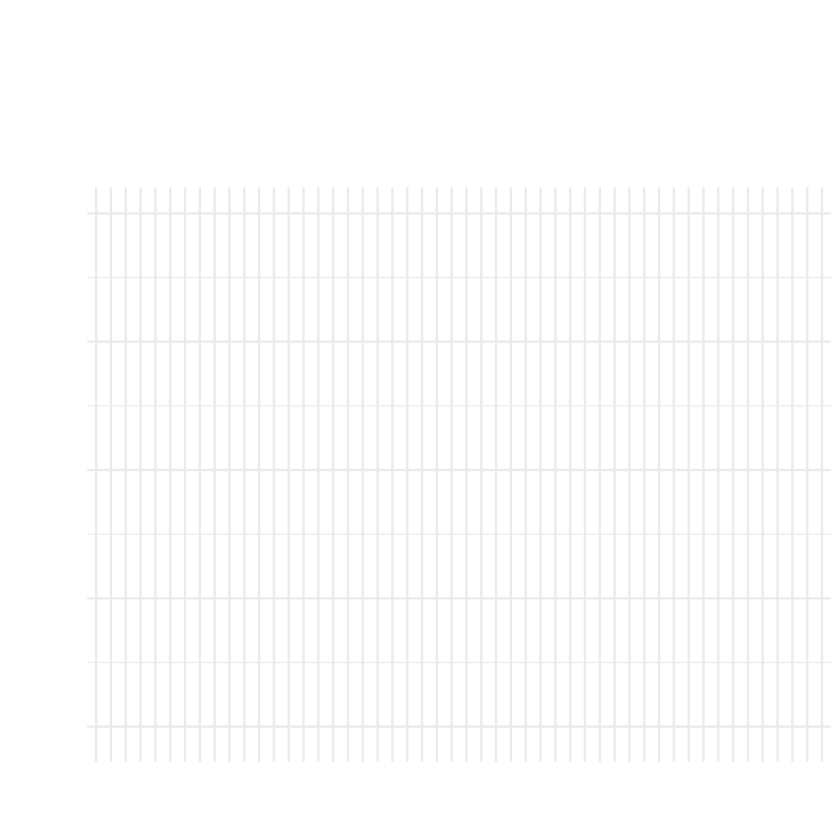

In [25]:
diabetes %>%
  vis_miss(warn_large_data=FALSE)

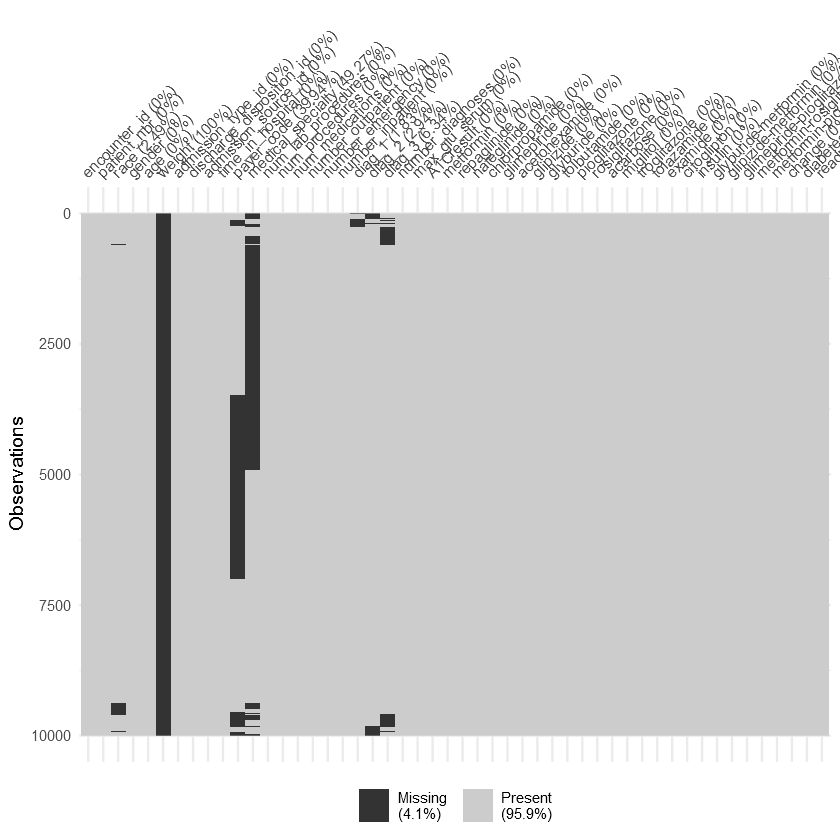

In [336]:
diabetes %>%
  sample_n(10000) %>%
  vis_miss(cluster=TRUE)

We can find that there are several columns associated with missing values, specifically, race, weight, pay_code, medical_specialty, diag_1, diag_2 and diag_3. Among them, most of the observations in weight column are empty, about half of the abservations in payer_code and medical_specialty columns. 

Apart from that, there are also some other problems on this dataset, such as, some of the column names contain a hyphen which could cause problems in some case, so we need to replace the hyphen with some acceptable symbol. 

In [38]:
colnames(diabetes)

[1] "encounter_id"             "patient_nbr"             
 [3] "race"                     "gender"                  
 [5] "age"                      "weight"                  
 [7] "admission_type_id"        "discharge_disposition_id"
 [9] "admission_source_id"      "time_in_hospital"        
[11] "payer_code"               "medical_specialty"       
[13] "num_lab_procedures"       "num_procedures"          
[15] "num_medications"          "number_outpatient"       
[17] "number_emergency"         "number_inpatient"        
[19] "diag_1"                   "diag_2"                  
[21] "diag_3"                   "number_diagnoses"        
[23] "max_glu_serum"            "A1Cresult"               
[25] "metformin"                "repaglinide"             
[27] "nateglinide"              "chlorpropamide"          
[29] "glimepiride"              "acetohexamide"           
[31] "glipizide"                "glyburide"               
[33] "tolbutamide"              "pioglitazone"            
[35] "rosiglitazone"            "acarbose"                
[37] "miglitol"                 "troglitazone"            
[39] "tolazamide"               "examide"                 
[41] "citoglipton"              "insulin"                 
[43] "glyburide-metformin"      "glipizide-metformin"     
[45] "glimepiride-pioglitazone" "metformin-rosiglitazone" 
[47] "metformin-pioglitazone"   "change"                  
[49] "diabetesMed"              "readmitted"

In [18]:
diabetes %<>%
  rename(glyburide_metformin="glyburide-metformin",
         glipizide_metformin="glipizide-metformin",
         glimepiride_pioglitazone="glimepiride-pioglitazone",
         metformin_rosiglitazone="metformin-rosiglitazone",
         metformin_pioglitazone="metformin-pioglitazone")

In [19]:
colnames(diabetes) # now the column names are in good format

[1] "encounter_id"             "patient_nbr"             
 [3] "race"                     "gender"                  
 [5] "age"                      "weight"                  
 [7] "admission_type_id"        "discharge_disposition_id"
 [9] "admission_source_id"      "time_in_hospital"        
[11] "payer_code"               "medical_specialty"       
[13] "num_lab_procedures"       "num_procedures"          
[15] "num_medications"          "number_outpatient"       
[17] "number_emergency"         "number_inpatient"        
[19] "diag_1"                   "diag_2"                  
[21] "diag_3"                   "number_diagnoses"        
[23] "max_glu_serum"            "A1Cresult"               
[25] "metformin"                "repaglinide"             
[27] "nateglinide"              "chlorpropamide"          
[29] "glimepiride"              "acetohexamide"           
[31] "glipizide"                "glyburide"               
[33] "tolbutamide"              "pioglitazone"            
[35] "rosiglitazone"            "acarbose"                
[37] "miglitol"                 "troglitazone"            
[39] "tolazamide"               "examide"                 
[41] "citoglipton"              "insulin"                 
[43] "glyburide_metformin"      "glipizide_metformin"     
[45] "glimepiride_pioglitazone" "metformin_rosiglitazone" 
[47] "metformin_pioglitazone"   "change"                  
[49] "diabetesMed"              "readmitted"

In [12]:
diabetes %>% write_csv("diabetes.csv") # save the data file

In [41]:
attributes

Feature name,Type,Description and values,% missing
,,,
,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hispanic, and other",2%
Gender,Nominal,"Values: male, female, and unknown/invalid",0%
Age,Nominal,"Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)",0%
Weight,Numeric,Weight in pounds.,97%
Admission type,Nominal,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available",0%
Discharge disposition,Nominal,"Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available",0%


Next, we can do some visualisation.
We can group the dataset by race and count the number of patients in each group and visualise it to see the differences between race.

In [42]:
cnt_by_race <- diabetes %>%
  group_by(race) %>%
  summarise(num_of_patients = length(unique(patient_nbr))) %>% # we need to count the unique patient code as there are duplicates
  na.omit() # omit the NA race
cnt_by_race

race,num_of_patients
AfricanAmerican,12932
Asian,517
Caucasian,53601
Hispanic,1534
Other,1209


We can genrate a simple pie chart to show the patient counts as well as percentages for each group.

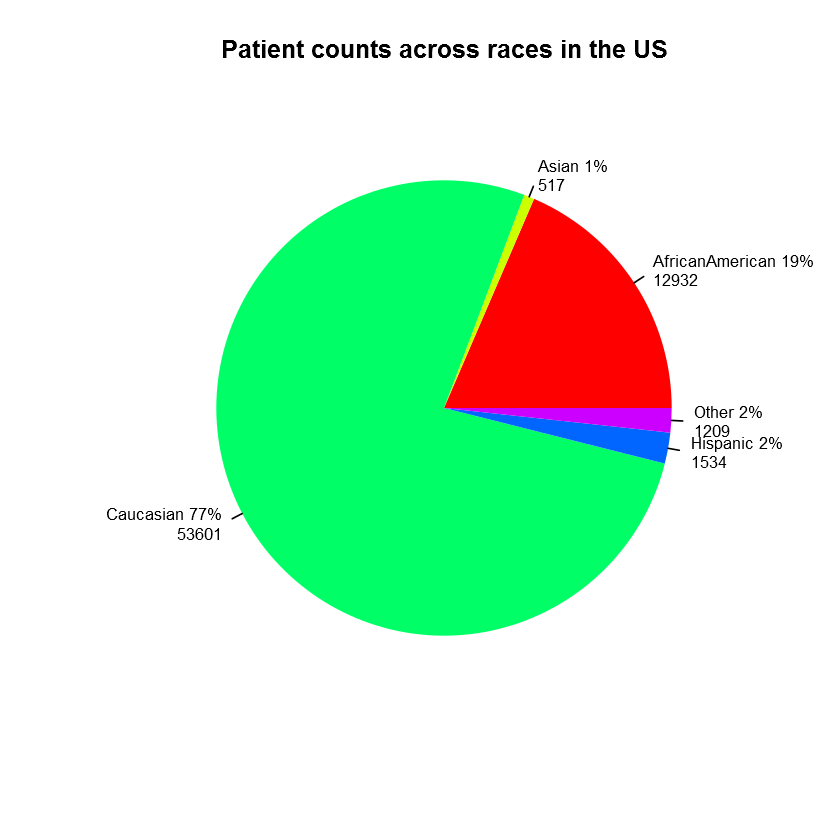

In [43]:
slices <- cnt_by_race$num_of_patients
lbls <- cnt_by_race$race
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels 
lbls <- paste(lbls,"%",sep="") # ad % to labels 
lbls <- paste(lbls, slices, sep="\n")
pie(slices,labels = lbls, col=rainbow(length(lbls)),
    main="Patient counts across races in the US", 
    cex=0.8, border=NA)

### We can find that in the US, in the diabetes population, 53601 people are Caucasian with a percentage of 77% and followed by African American with 19%.

We can also group the dataset by "gender", by "age group" or any other columns that we interested in and generate the count. So we can define a function for this process. 

Note that here we cannot use the group_by() function, instead we should use group_by_(). As per the documentation, the dplyr library offers twin versions of each verb suffixed with an uderscore which enables programming with dplyr, ie enable taking the arguments by value not by code. Although the documentation indicates the underscored versions are now superfluous, we found the group_by() function won't work here, we have to use group_by_() instead.

In [21]:
cnt_by_col <- function(col_name){
    #attach(diabetes)
    col=substitute(col_name)
    cnt_by_col_df=diabetes %>%
      group_by_(col_name) %>%
      summarise(num_of_patients=length(unique(patient_nbr))) %>%
      na.omit()

    return(cnt_by_col_df)
}

Now, we can use this function to group our dataset by the columns that we interested in and do some analysis. 

In [45]:
cnt_by_age <- cnt_by_col("age")
cnt_by_age

age,num_of_patients
[0-10),154
[10-20),536
[20-30),1138
[30-40),2727
[40-50),6956
[50-60),12666
[60-70),16281
[70-80),18584
[80-90),12008
[90-100),2042


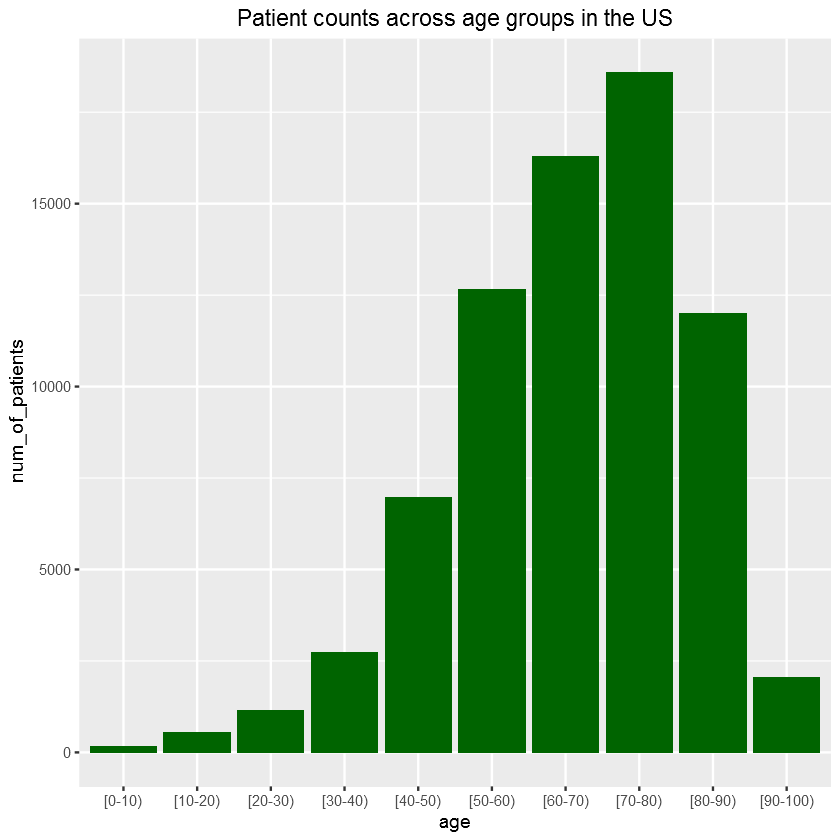

In [343]:
cnt_by_age %>%
  ggplot(aes(x=age, y=num_of_patients)) + 
  geom_col(fill="darkgreen") + 
  ggtitle("Patient counts across age groups in the US") +
  theme(plot.title = element_text(hjust = 0.5))

#### We can find that the age group of 70-80 is NO1 group of patients.

We can also do the similar visualisation using the original diabetes table.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

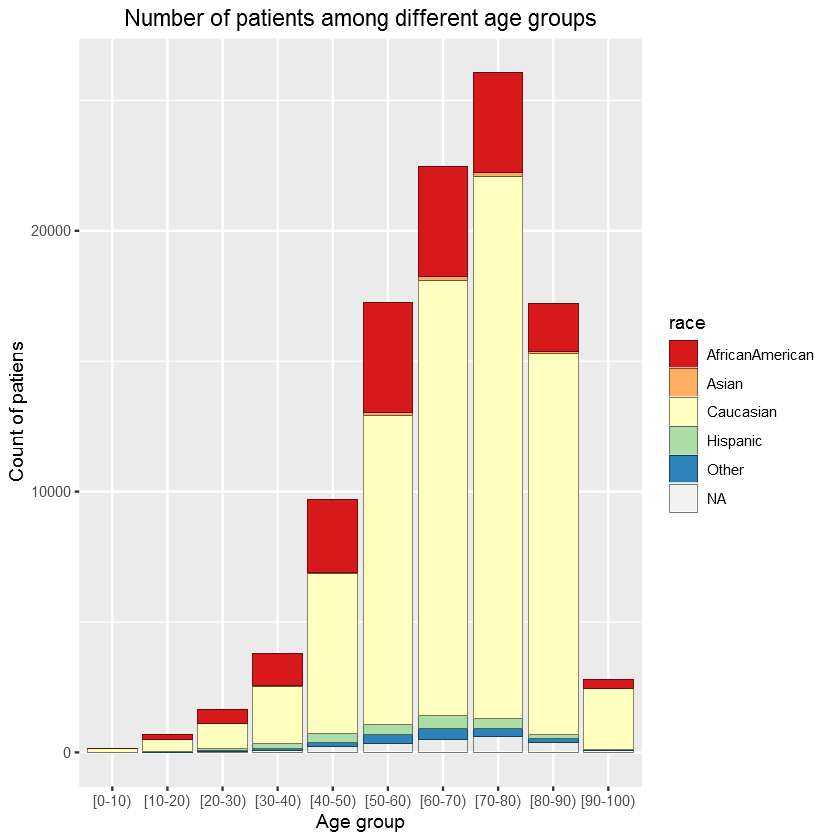

In [82]:
diabetes %>%
  ggplot(aes(age)) + 
  scale_fill_brewer(palette = "Spectral") +
  geom_histogram(aes(fill=race),
                   col="black",
                   size=.1,
                   stat="count") +  
  labs(title="Number of patients among different age groups", 
       x="Age group",
       y="Count of patiens")  +
  theme(plot.title = element_text(hjust = 0.5))

#### We can find that the group with highest number of patients are 70-80, followed by 60-70. We can also see that the Causasians accounts for most of the patients among other races in the US from this plot. 

Similarly, we can get the count of patients for different genders.

In [23]:
cnt_by_gender <- cnt_by_col("gender")
cnt_by_gender

gender,num_of_patients
Female,38026
Male,33492
Unknown/Invalid,3


#### We can visualisa this data using a pie chart.

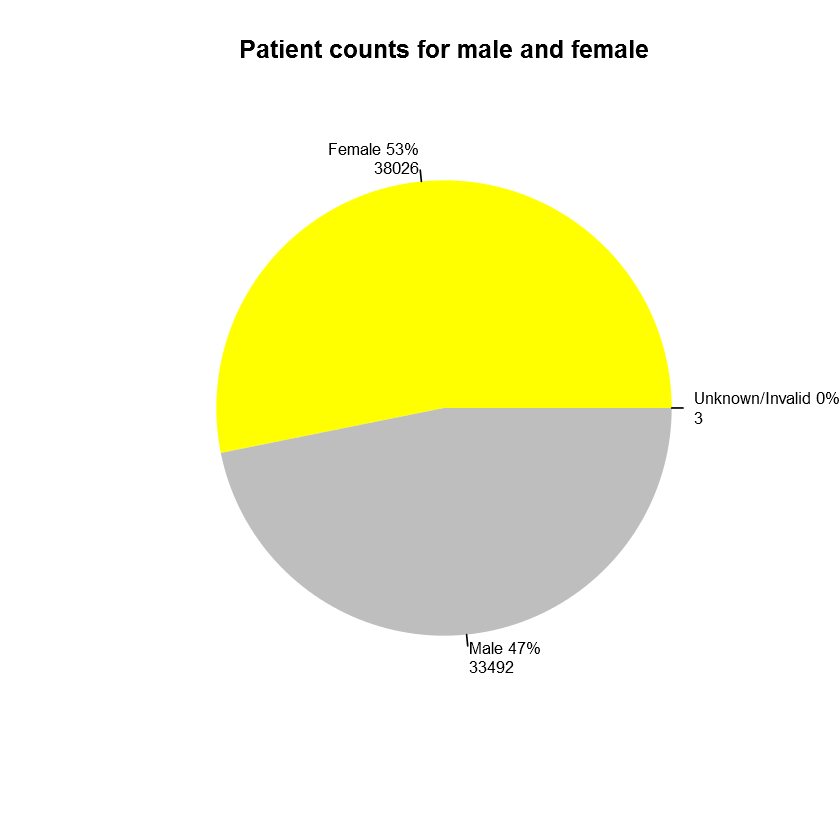

In [36]:
slices <- cnt_by_gender$num_of_patients
lbls <- cnt_by_gender$gender
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels 
lbls <- paste(lbls,"%",sep="") # ad % to labels 
lbls <- paste(lbls, slices, sep="\n")
pie(slices,labels = lbls, col=(1:length(lbls)+6),
    main="Patient counts for male and female", 
    cex=0.8, border=NA)

### Next, we would like to visualise whether there are any relationship between admission type (e.g. emergency, urgent) and the secondary diagnosis.

In the diabetes table, the admission types are coded as numbers, the code for this admission_type_id is store in the metadata table. In order to have a better visualisation, we could first merge the metadata table with the diabetes table.

In [46]:
admission_type %>% glimpse()

Observations: 8
Variables: 2
$ admission_type_id <int> 1, 2, 3, 4, 5, 6, 7, 8
$ description       <chr> "Emergency", "Urgent", "Elective", "Newborn", "No...


In [47]:
df <- diabetes %>%
  select(encounter_id, diag_2, admission_type_id) %>%
  left_join(admission_type, by="admission_type_id")
df

encounter_id,diag_2,admission_type_id,description
2278392,NA,6,NULL
149190,250.01,1,Emergency
64410,250.00,1,Emergency
500364,250.43,1,Emergency
16680,157.00,1,Emergency
35754,411.00,2,Urgent
55842,411.00,3,Elective
63768,492.00,1,Emergency
12522,427.00,2,Urgent
15738,198.00,3,Elective


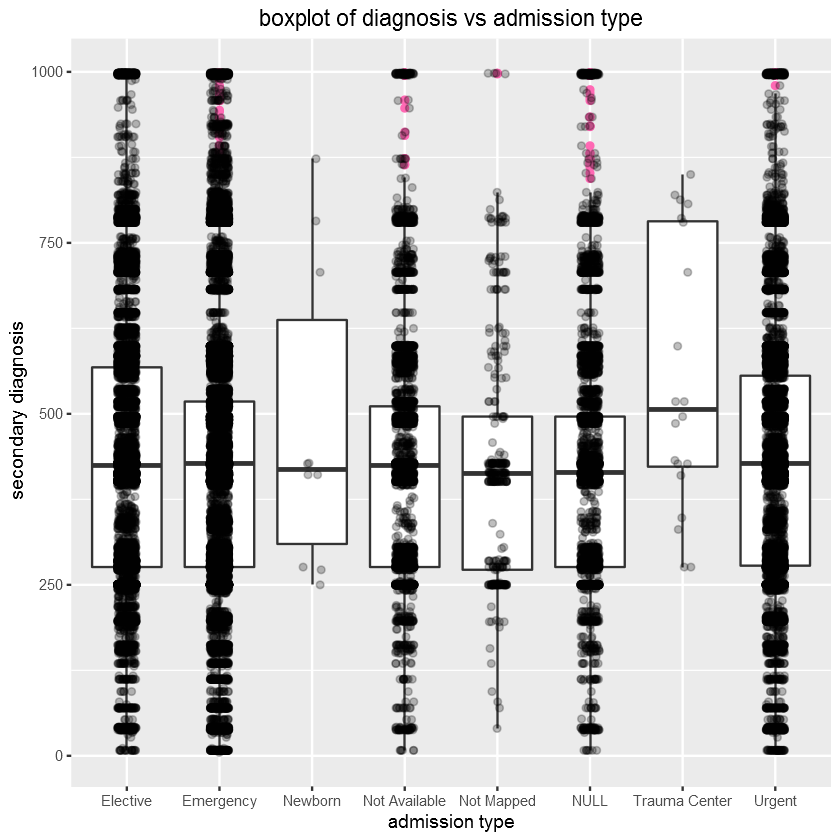

In [73]:
df %>%
  na.omit() %>%
  ggplot(aes(group = description,x=description, y = diag_2)) +
  geom_boxplot(outlier.colour = "hotpink" ) +
  geom_jitter(position = position_jitter(width=0.1, height =0 ), alpha =1/4) +
  ylab("secondary diagnosis") +
  xlab("admission type") + 
  ggtitle("boxplot of diagnosis vs admission type") +
  theme(plot.title = element_text(hjust = 0.5))

#### From the plot above, we cannot find any particular pattern here.

### This dataset is suitable for classification, we can use the various features in the datasest to predict whether the patients will be readmitted by the hospital, but as modeling is not our purpose of this project, we will not fit any model to this dataset, but we can do some plots and explore the relationship between the various features and the readmitted status. 

We will visualise the days in hospital vs the readmitted type.

In [49]:
diabetes %>% select(readmitted) %>% distinct() # there are three distinct values in the readmitted column

readmitted
NO
>30
<30


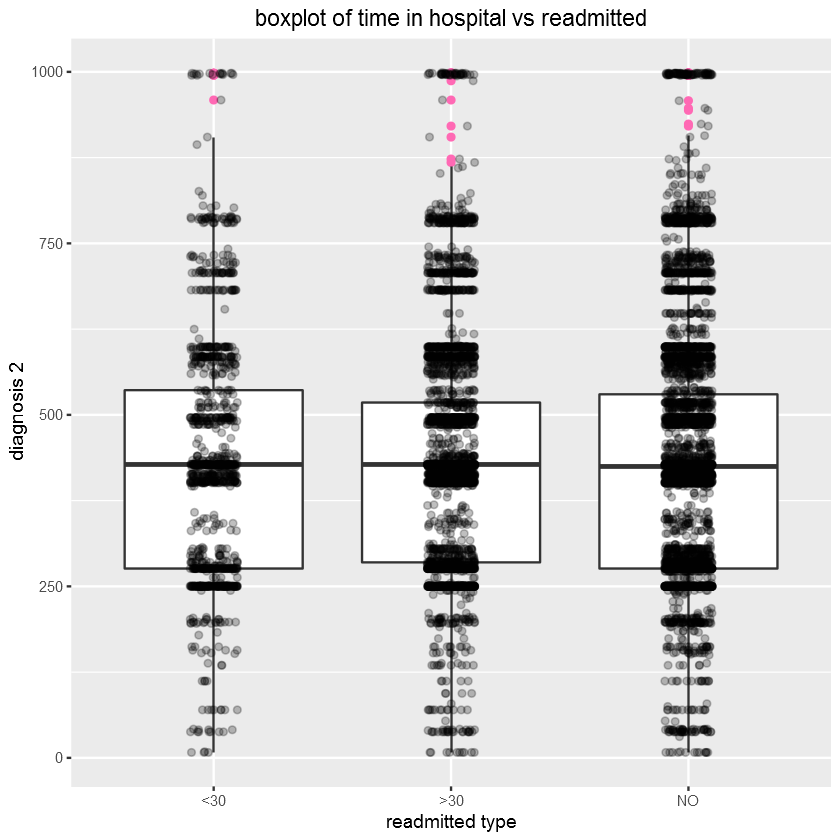

In [72]:
diabetes %>%
  select(encounter_id, diag_2, readmitted) %>%
  na.omit() %>% 
  sample_frac(0.1) %>%
  ggplot(aes(group = readmitted,x=readmitted, y = diag_2)) +
  geom_boxplot(outlier.colour = "hotpink" ) +
  geom_jitter(position = position_jitter(width=0.1, height =0 ), alpha =1/4) +
  ylab("diagnosis 2") +
  xlab("readmitted type") + 
  ggtitle("boxplot of time in hospital vs readmitted") +
  theme(plot.title = element_text(hjust = 0.5))

#### There is not much differences about the diagnosis between different readmitted types, but we can find that there are more people that were not readmitted by the hospitals.

#### There are not many quantitative variables in the dataset, the only quantitative variables with continuous values are dig_1, diag_2 and diag_3 which stands for primary diagnosis, secondary diagnosis and additional diagnosis. We would like to explore whether there are any relationship between primary diagnosis and secondary diagnosis.

Warning message:
"Using size for a discrete variable is not advised."Warning message:
"Removed 31 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 31 rows containing missing values (geom_point)."

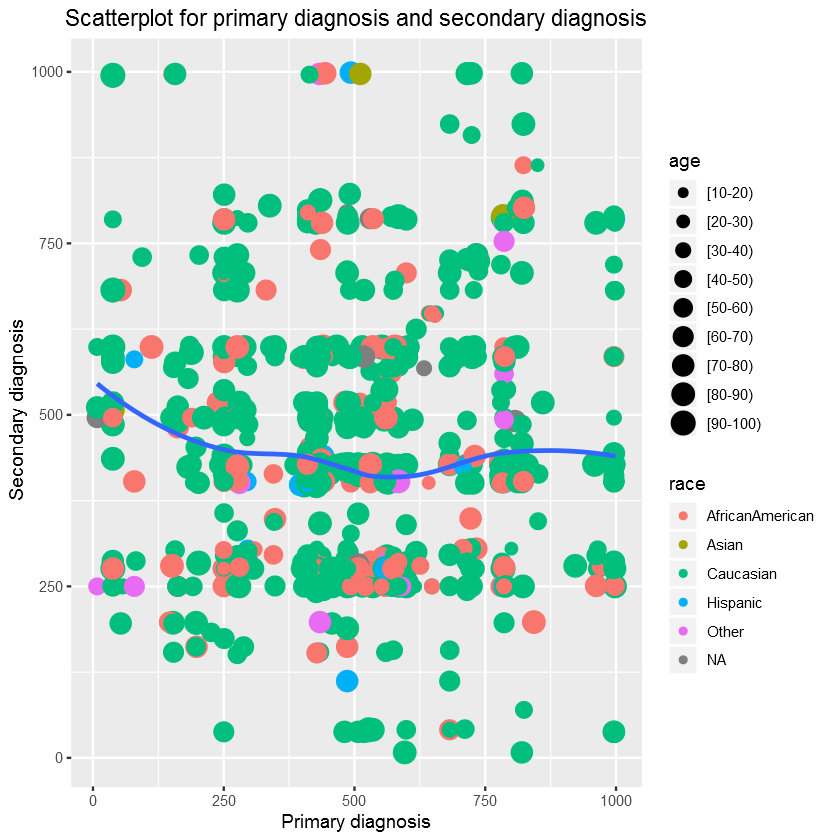

In [13]:
diabetes %>% 
  sample_frac(0.01) %>%
  ggplot(aes(x=diag_1, y=diag_2)) + 
  geom_point(aes(col=race, size=age)) +   # draw points
  geom_smooth(method="loess", se=F) + 
  labs(y="Secondary diagnosis", 
       x="Primary diagnosis", 
       title="Scatterplot for primary diagnosis and secondary diagnosis") +
  theme(plot.title = element_text(hjust = 0.5))

### From the plot, we cannot identify any pattern between the primary diagnosis and secondary diagnosis.